# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- Introduction to the data set.
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb).
The dataset contains 10,866 rows and 21 columns, such as popularity, budget, revenue, original title of the movie, and more details for each movie produced.

- Questions I plan to explore?
    1. In what year were the highest and lowest number of movies released?
    2. What were the highest profit movies from 1960 to 2015?
    3. What are the movies that have achieved the highest and lowest revenue?
    4. What movies have the highest and lowest ratings from viewers?
    5. Who are the most prominent directors who have shot the most movies?
    6. What is the relationship between revenue and movie popularity?
    7. What is the relationship between revenue and movie budget?
    8. What is the relationship between revenue and viewers' vote on the movie?

<a id='wrangling'></a>
## Data Wrangling

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.reset_option('display.float_format')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
pd.set_option('display.max_columns', None)

### Gathering Data

In [5]:
df = pd.read_csv('db-movies.csv')

In [6]:
df.shape

(10866, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,"Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.",124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dystopic future,Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Clening

In [10]:
df_c = df.copy()

#### 1- Remove any unnecessary columns so that the table contains only information relevant to my analysis.
> Remove columns using `.drop()` function

##### Code

In [11]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [12]:
# Remove unnecessary columns
df_c.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

##### Test

In [13]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [14]:
df_c.shape

(10866, 16)

#### 2- Remove Duplicate Rows
> Remove the duplicate row using `drop_duplicates()` function

##### Code

In [15]:
df_c.duplicated().sum()

1

In [16]:
df_c.drop_duplicates(inplace = True)

##### Test

In [17]:
df_c.duplicated().sum()

0

#### 3- Drop rows that contain incorrect or Nan values.
> Remove rows using `.dropna()` function

#### Note:
- Using `.isna()` or `.isnull()` to select all rows with NaN under a single DataFrame column:
    - df[df['column name'].isna()]
- Using `.isna()` to select all rows with NaN under an entire DataFrame:
    - [df.isna().any(axis=1)]

##### Code

In [18]:
df_c.shape

(10865, 16)

In [19]:
df_c.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [20]:
print("Rows With Zero Values In The Budget Column:", df_c[(df_c['budget'] == 0)].shape[0])
print("Rows With Zero Values In The Revenue Column:", df_c[(df_c['revenue'] == 0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


In [21]:
# Remove rows with Nan values
df_c.dropna(inplace = True)

##### Test

In [22]:
df_c.shape

(9772, 16)

In [23]:
df_c.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### 4- Modify values separated by linear characters (|) in`cast`, `genres` and `production_companies` colnmns.
> Using `split()` funcion

##### Code

In [24]:
df_c.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [25]:
df_c['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 9772, dtype: object

In [26]:
df_c['cast'] = df_c['cast'].str.split('|')
df_c['genres'] = df_c['genres'].str.split('|')
df_c['production_companies'] = df_c['production_companies'].str.split('|')

##### Test

In [27]:
df_c.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan, Vincent D'Onofrio, Nick Robinson]",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Legendary Pictures, Fuji Television Network, Dentsu]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [28]:
df_c['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 9772, dtype: object

#### 5- Change the `release_date` column from object to datetime
> Using `to_datetime()` function

##### Code

In [29]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  release_date          9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
 14  budget_adj            9772 non-null   float64
 15  revenue_adj         

In [30]:
df_c['release_date'] = pd.to_datetime(df_c['release_date'])

##### Test

In [31]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

<a id='eda'></a>
## Exploratory Data Analysis

In [32]:
mov = df_c.copy()

### Question 1: In what year were the highest and lowest number of movies released?

In [33]:
# Make group for each year and count the number of movies in each year 
date = mov.groupby('release_year').count()['id']
date

# OR
# date = mov.pivot_table(columns=['release_year'], aggfunc='size')

release_year
1960     32
1961     30
1962     30
1963     34
1964     41
1965     34
1966     44
1967     36
1968     37
1969     29
1970     40
1971     55
1972     37
1973     55
1974     44
1975     42
1976     46
1977     55
1978     61
1979     56
1980     73
1981     78
1982     80
1983     77
1984     99
1985    106
1986    109
1987    113
1988    132
1989    128
1990    126
1991    125
1992    126
1993    172
1994    174
1995    170
1996    196
1997    180
1998    191
1999    212
2000    196
2001    212
2002    241
2003    254
2004    253
2005    323
2006    350
2007    389
2008    441
2009    474
2010    420
2011    456
2012    498
2013    567
2014    635
2015    558
Name: id, dtype: int64

In [34]:
max_num = date.max()
mini_num = date.max()

print("The largest number of movies produced in one year is: ",max_num , " And it was in 2014")
print("The lowest number of movies produced in one year is: ",mini_num , " And it was in 1969")

The largest number of movies produced in one year is:  635  And it was in 2014
The lowest number of movies produced in one year is:  635  And it was in 1969


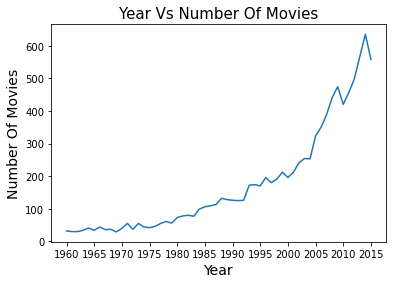

In [35]:
date.plot(xticks = np.arange(1960,2016,5))

#set the size and labels
plt.title("Year Vs Number Of Movies",fontsize = 15)
plt.xlabel('Year',fontsize = 14);
plt.ylabel('Number Of Movies',fontsize = 14);

### Answer 1:
- The lowest number of movies produced in 1969
- The largest number of movies produced in 2014
- As shown over the years, the number of films produced increases from year to year

### Question 2: What were the highest profit movies from 1960 to 2015?

In [36]:
# Calculation of profit for each movie
mov['profit'] = mov['revenue'] - mov['budget']

In [37]:
# Print The movie with the highest profit
max_profit = mov['profit'].max()
mov[mov['profit'] == max_profit]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,9.432768,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez]",James Cameron,162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]",2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847


In [38]:
# Print The movie with the lowest profit
mini_profit = mov['profit'].min()
mov[mov['profit'] == mini_profit]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.25054,425000000,11087569,The Warrior's Way,"[Kate Bosworth, Jang Dong-gun, Geoffrey Rush, Danny Huston, Ti Lung]",Sngmoo Lee,100,"[Adventure, Fantasy, Action, Western, Thriller]",[Boram Entertainment Inc.],2010-12-02,74,6.4,2010,425000000.0,11087569.0,-413912431


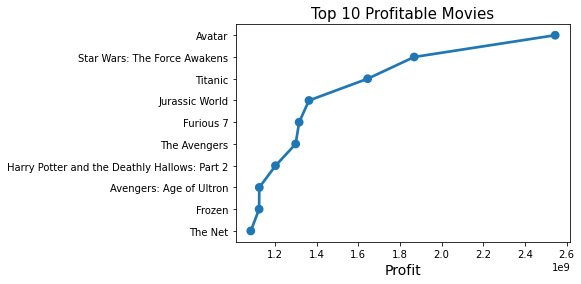

In [39]:
# Make a plot which contain top 10 movies which earn highest profit.
df_profit = pd.DataFrame(mov['profit'])
df_profit['original_title'] = mov['original_title']
# Sort
df_profit = df_profit.sort_values(by=['profit'], ascending=False)

data = list(map(str,(df_profit['original_title'])))
x = list(data[:10])
y = list(df_profit['profit'][:10])

ax = sns.pointplot(x=y,y=x)
ax.set_title("Top 10 Profitable Movies",fontsize = 15);
ax.set_xlabel("Profit",fontsize = 14);

### Answer 2: 
- The highest-grossing movie was Avatar in 2009, directed by James Cameron, and the genre was [Action, Adventure, Fantasy, Sci-Fi]

- Therefore, in order to achieve the highest profits for the movie, you must follow the specifications of the movie Avatar and the other highest-grossing films because these are the ones that the viewers liked.
- But, The movie that took the most number of losses is The Warrior's Way in 2010 directed by Sngmoo Lee
- So it is best to stay away from the specifications of the movie The Warrior's Way

### Question 3: What are the movies that have achieved the highest and lowest revenue?

In [40]:
# Print The movie with the highest revenue
max_rev = mov['revenue'].max()
mov[mov['revenue'] == max_rev]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,9.432768,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez]",James Cameron,162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]",2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847


In [41]:
# Print The movie with the lowest revenue
mini_rev = mov['revenue'].min()
mov[mov['revenue'] == mini_rev]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
48,265208,2.932340,30000000,0,Wild Card,"[Jason Statham, Michael Angarano, Milo Ventimiglia, Dominik GarcÃ­a-Lorido, Anne Heche]",Simon West,92,"[Thriller, Crime, Drama]","[Current Entertainment, Lionsgate, Sierra / Affinity, SJ Heat Productions, Silver State Production Services]",2015-01-14,481,5.3,2015,2.759999e+07,0.0,-30000000
67,334074,2.331636,20000000,0,Survivor,"[Pierce Brosnan, Milla Jovovich, Dylan McDermott, Angela Bassett, Robert Forster]",James McTeigue,96,"[Crime, Thriller, Action]","[Nu Image Films, Winkler Films, Millennium Films, Survivor Productions]",2015-05-21,280,5.4,2015,1.839999e+07,0.0,-20000000
74,347096,2.165433,0,0,Mythica: The Darkspore,"[Melanie Stone, Kevin Sorbo, Adam Johnson, Jake Stormoen, Rocky Myers]",Anne K. Black,108,"[Action, Adventure, Fantasy]",[Arrowstorm Entertainment],2015-06-24,27,5.1,2015,0.000000e+00,0.0,0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,"[Thomas Mann, RJ Cyler, Olivia Cooke, Connie Britton, Nick Offerman]",Alfonso Gomez-Rejon,105,"[Comedy, Drama]",[Indian Paintbrush],2015-06-12,569,7.7,2015,0.000000e+00,0.0,0
92,370687,1.876037,0,0,Mythica: The Necromancer,"[Melanie Stone, Adam Johnson, Kevin Sorbo, Nicola Posener, Jake Stormoen]",A. Todd Smith,0,"[Fantasy, Action, Adventure]","[Arrowstorm Entertainment, Camera 40 Productions, Bellpond Films]",2015-12-19,11,5.4,2015,0.000000e+00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,"[Michael Hynson, Robert August, Lord 'Tally Ho' Blears, Bruce Brown, Chip Fitzwater]",Bruce Brown,95,[Documentary],[Bruce Brown Films],2066-06-15,11,7.4,1966,0.000000e+00,0.0,0
10862,20379,0.065543,0,0,Grand Prix,"[James Garner, Eva Marie Saint, Yves Montand, ToshirÅ Mifune, Brian Bedford]",John Frankenheimer,176,"[Action, Adventure, Drama]","[Cherokee Productions, Joel Productions, Douglas & Lewis Productions]",2066-12-21,20,5.7,1966,0.000000e+00,0.0,0
10863,39768,0.065141,0,0,Beregis Avtomobilya,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georgi Zhzhyonov, Olga Aroseva, Lyubov Dobrzhanskaya]",Eldar Ryazanov,94,"[Mystery, Comedy]",[Mosfilm],2066-01-01,11,6.5,1966,0.000000e+00,0.0,0
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?","[Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama, John Sebastian, Tadao Nakamaru]",Woody Allen,80,"[Action, Comedy]",[Benedict Pictures Corp.],2066-11-02,22,5.4,1966,0.000000e+00,0.0,0


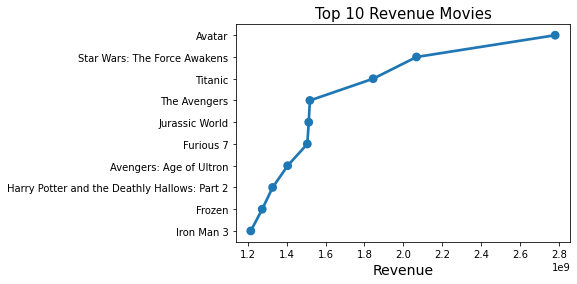

In [42]:
# Make a plot which contain top 10 movies which earn highest revenue.
df_rev = pd.DataFrame(mov['revenue'])
df_rev['original_title'] = mov['original_title']
# Sort
df_rev = df_rev.sort_values(by=['revenue'], ascending=False)

data = list(map(str,(df_rev['original_title'])))
x = list(data[:10])
y = list(df_rev['revenue'][:10])

ax = sns.pointplot(x=y,y=x)
ax.set_title("Top 10 Revenue Movies",fontsize = 15);
ax.set_xlabel("Revenue",fontsize = 14);

### Question 4: What movies have the highest and lowest ratings from viewers?

In [43]:
# Print The movie with the highest vote
max_vote = mov['vote_average'].max()
mov[mov['vote_average'] == max_vote]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
6911,24970,0.21201,0,0,Pink Floyd: Pulse,"[David Gilmour, Nick Mason, Richard Wright, Sam Brown, Jon Carin]",David Mallet,145,[Music],"[SMV Enterprises, Columbia Music Video, EMI]",2006-07-09,23,8.7,2006,0.0,0.0,0


In [44]:
# Print The movie with the lowest vote
mini_vote = mov['vote_average'].min()
mov[mov['vote_average'] == mini_vote]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
7772,25055,0.121120,0,0,Transmorphers,"[Matthew Wolf, Amy Weber, Shaley Scott, Eliza Swenson, Griff Furst]",Leigh Scott,86,"[Action, Adventure, Science Fiction]","[Asylum, The]",2007-06-26,10,1.5,2007,0.000000,0.0,0
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,"[Harold P. Warren, Tom Neyman, John Reynolds, Diane Mahree, Stephanie Nielson]",Harold P. Warren,74,[Horror],[Norm-Iris],2066-11-15,15,1.5,1966,127642.279154,0.0,-19000


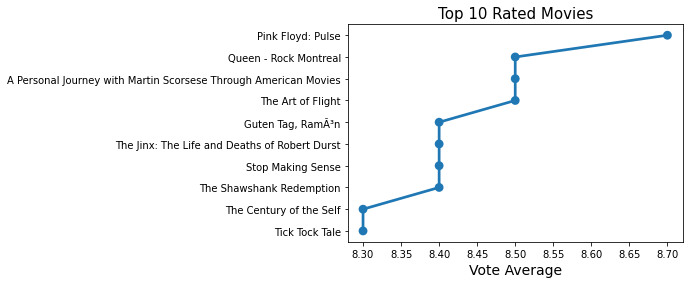

In [45]:
# Make a plot which contain top 10 movies which earn highest vote.
df_vote = pd.DataFrame(mov['vote_average'])
df_vote['original_title'] = mov['original_title']
# Sort
df_vote = df_vote.sort_values(by=['vote_average'], ascending=False)

data = list(map(str,(df_vote['original_title'])))
x = list(data[:10])
y = list(df_vote['vote_average'][:10])

ax = sns.pointplot(x=y,y=x)
ax.set_title("Top 10 Rated Movies",fontsize = 15);
ax.set_xlabel("Vote Average",fontsize = 14);

### Answer 4:
- The movie with the highest rating is Pink Floyd: Pulse in 2006, but unfortunately it is not clear whether this vote made a difference in revenue or not.
- The movie with the lowest rating is Transmorphers in 2007, but unfortunately it's not clear if this vote made a difference in revenue.

### Question 5: Who are the most prominent directors who have shot the most movies?

In [46]:
count_dir = mov['director'].value_counts()
count_dir

Woody Allen                         42
Clint Eastwood                      34
Steven Spielberg                    29
Martin Scorsese                     26
Ridley Scott                        23
                                    ..
Alberto Sironi                       1
Brett Simon                          1
Mike Maguire|Tom Kuntz               1
Susanna White|Simon Cellan Jones     1
Harold P. Warren                     1
Name: director, Length: 4505, dtype: int64

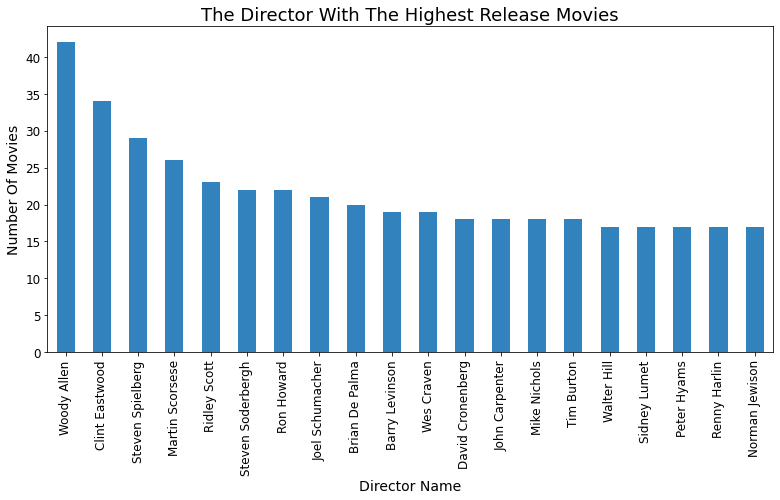

In [47]:
count_dir[:20].plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c');

plt.title("The Director With The Highest Release Movies",fontsize=18);
plt.xlabel('Director Name',fontsize=14);
plt.ylabel("Number Of Movies",fontsize= 14);

### Answer 5:
- One of the reasons for the success of the film is the director because he excelled in producing the film
- Therefore, it is better to choose the best experienced director for the success of the film
- And here is the director who produced the largest number of films is Woody Allen

### Question 6: What is the relationship between revenue and movie popularity?

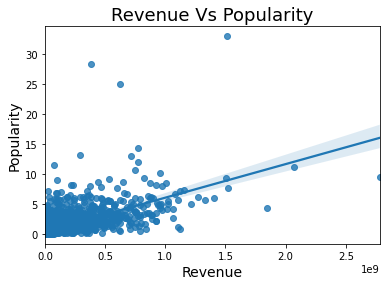

In [48]:
ax = sns.regplot(x='revenue', y='popularity', data=mov)

plt.title('Revenue Vs Popularity', fontsize = 18)
plt.xlabel('Revenue', fontsize = 14);
plt.ylabel('Popularity', fontsize = 14);

### Answer 6: Popularity vs Revenue
- Obviously, revenue increases directly with popularity.
- That is, we can take into account that if the popularity of the movie is high, a large percentage of the movie will achieve high revenues

### Question 7: What is the relationship between revenue and movie budget?

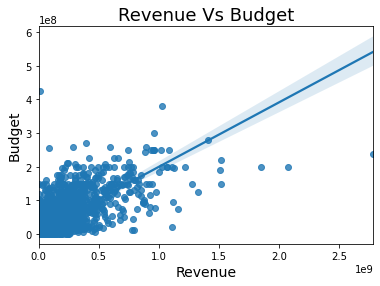

In [49]:
ax = sns.regplot(x='revenue', y='budget', data=mov)

plt.title('Revenue Vs Budget', fontsize = 18)
plt.xlabel('Revenue', fontsize = 14);
plt.ylabel('Budget', fontsize = 14);

### Answer 7: Budget vs Revenue
- Revenue increases with the budget slightly, but it is clear that many films do not have a high budget.
- But few films with high budgets make high revenues
- Also, investing in the film's budget will yield a good return on revenue.

### Question 8: What is the relationship between revenue and viewers' vote on the movie?

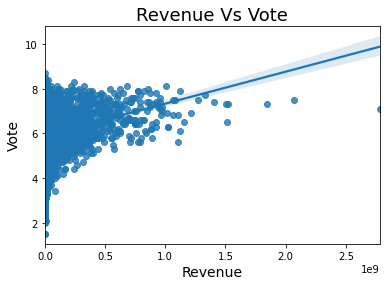

In [50]:
x = sns.regplot(x='revenue', y='vote_average', data=mov)

plt.title('Revenue Vs Vote', fontsize = 18)
plt.xlabel('Revenue', fontsize = 14);
plt.ylabel('Vote', fontsize = 14);

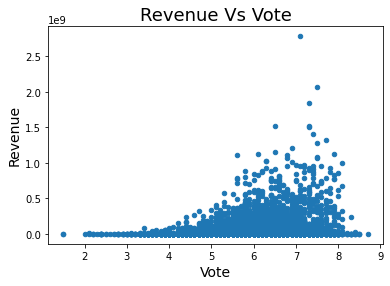

In [51]:
mov.plot(x='vote_average',y='revenue',kind='scatter')

plt.title('Revenue Vs Vote', fontsize = 18)
plt.xlabel('Vote', fontsize = 14);
plt.ylabel('Revenue', fontsize = 14);

### Answer 7: Vote for Revenue
- Voting has nothing to do with revenue.
- This means that sometimes the result is correct and expected revenue, and sometimes it is not.
- But in the end, voting cannot be relied on to determine the extent of revenue increase

<a id='conclusions'></a>
## Conclusions

- The largest number of movies were produced in 2014.
- "Avatar", "Star Wars" and "Titanic" are the highest profit movies.
- The movie that took the most number of losses is The Warrior's Way in 2010.
- The movie with the highest rating is Pink Floyd: Pulse in 2006.
- The movie with the lowest rating is Transmorphers in 2007.
- The director who has produced the most movies is Woody Allen.
- If the popularity of the movie is high, a large percentage of the movie will achieve high revenues.
- Movies with higher budgets showed a corresponding increase in revenue.
- Voting cannot be relied on to determine the extent of revenue increase

 ## The Limitations

### The limitation I had was in the data wrangling section when I cleaned up the data.
1. Some of the challenges I had with this project are when printing rows with zero values in the budget and revenue,And i find it...
>Rows With Zero Values In The Budget Column: **5696** Rows With Zero Values In The Revenue Column: **6016**

***
So I discovered that it is a large number of rows, and if I clean and delete those rows, I will lose a lot of data
So I was limited to cleaning this part.
***

2. It was difficult for me to analyze the genre column because there are some movies that have one genre and others that have more than one genre.
***
So I was limited and unable to count the most popular genres and the highest revenue movie genres.
***

# THANKS